In [1]:
%matplotlib inline

In [2]:
import random

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_context("talk")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#Linear Regression on Iris 

In [21]:
iris = pd.read_csv('data/iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'
                                                        ])
sns.pairplot(iris, hue='species')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Predicting Sepal Length

In [7]:
n = len(iris)
is_train = np.random.rand(n) < 0.7
train = iris[is_train].reset_index(drop=True)
test = iris[is_train].reset_index(drop=True)

In [9]:
lin_model = smf.ols('sepal_length ~ sepal_width', train).fit()
lin_model.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>sepal_length</td>   <th>  R-squared:         </th> <td>   0.005</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>  -0.004</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>  0.5517</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 20 Jul 2017</td> <th>  Prob (F-statistic):</th>  <td> 0.459</td> 
</tr>
<tr>
  <th>Time:</th>                 <td>00:15:31</td>     <th>  Log-Likelihood:    </th> <td> -125.18</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   103</td>      <th>  AIC:               </th> <td>   254.4</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   101</td>      <th>  BIC:               </th> <td>   259.6</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     1</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
       <td></td>          <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th>   <td>    6.1849</td> <td>    0.575</td> <td>   10.758</td> <td> 0.000</td> <td>    5.044</td> <td>    7.325</td>
</tr>
<tr>
  <th>sepal_width</th> <td>   -0.1400</td> <td>    0.188</td> <td>   -0.743</td> <td> 0.459</td> <td>   -0.514</td> <td>    0.234</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 4.117</td> <th>  Durbin-Watson:     </th> <td>   0.925</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.128</td> <th>  Jarque-Bera (JB):  </th> <td>   4.084</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.449</td> <th>  Prob(JB):          </th> <td>   0.130</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 2.617</td> <th>  Cond. No.          </th> <td>    23.9</td>
</tr>
</table>

#Testing Accuracy using RMSE

In [14]:
def rmse(y, yhat):
    return np.sum((y - yhat)**2)**0.5

preds = lin_model.predict(test)
print('The RMSE is {}'.format(rmse(test['sepal_length'], preds)))

The RMSE is 8.2793669332211


#Expanding model

In [16]:
lin_model = smf.ols('sepal_length ~ sepal_width + petal_width + petal_length + species', train).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 20 Jul 2017   Prob (F-statistic):           1.14e-40
Time:                        01:01:36   Log-Likelihood:                -22.107
No. Observations:                 103   AIC:                             56.21
Df Residuals:                      97   BIC:                             72.02
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [17]:
preds = lin_model.predict(test)
print('The RMSE is {}'.format(rmse(test['sepal_length'], preds)))

The RMSE is 3.043650742679303


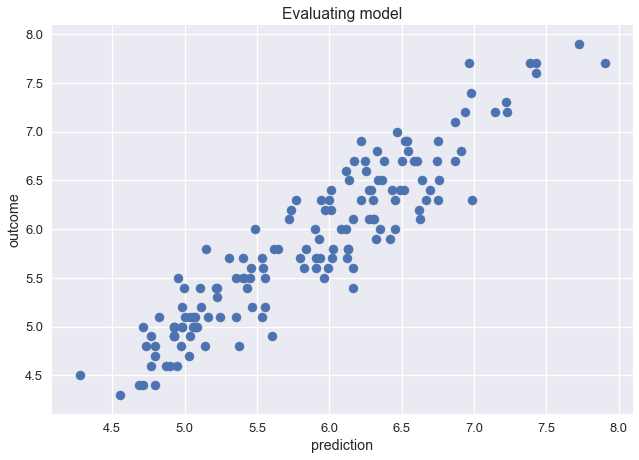

In [19]:
iris['sepal_length_hat'] = lin_model.predict(iris)

f,ax = plt.subplots()

ax.scatter(iris['sepal_length_hat'], iris['sepal_length'])
ax.set_xlabel('prediction')
ax.set_ylabel('outcome')
ax.set_title('Evaluating model')

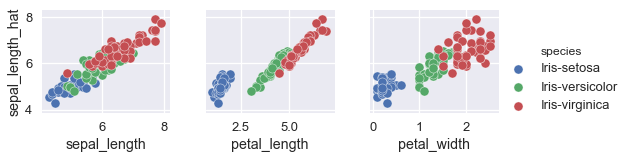

In [20]:
sns.pairplot(iris, hue='species', y_vars=['sepal_length_hat'], x_vars=['sepal_length', 'petal_length',
                                                                       'petal_width'])